In [24]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

In [25]:
# load data , dropna and rename column
df = pd.read_csv('df_all.csv')
df = df.rename(columns = {'Unnamed: 0':'idx'})

In [26]:
# clean data
cols_slc = ['idx', 'Date', 'Start(ET)', 'Visitor/Neutral', 'PTS', 'Home/Neutral',
       'PTS.1', 'Attend']
df = df[cols_slc]
df = df[~(df['Start(ET)'].isnull())]

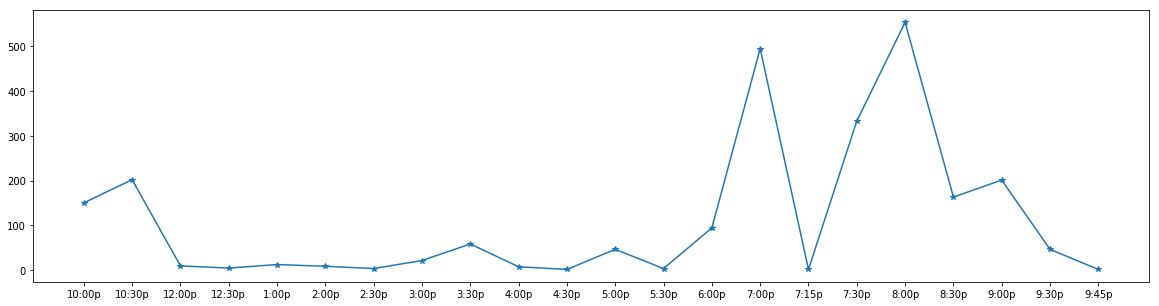

In [27]:
df_v_c = df['Start(ET)'].value_counts().reset_index().sort_values(by = 'index' ,ascending = True)
# df_v_c
plt.figure(figsize = (20,5))
plt.plot(df_v_c['index'].values,df_v_c['Start(ET)'].values , '*-')

# so onehot for 4 time during 12:00p-5:30p, 5:30p-7:15p, 7:15p-8:30p , 8:30p-12:00p

In [28]:
df.head()

,idx,Date,Start(ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend
1,1,"Tue, Oct 16, 2018",8:00p,Philadelphia 76ers,87.0,Boston Celtics,105.0,"18,624"
2,2,"Wed, Oct 17, 2018",10:30p,Oklahoma City Thunder,100.0,Golden State Warriors,108.0,"19,596"
3,3,"Wed, Oct 17, 2018",7:00p,Milwaukee Bucks,113.0,Charlotte Hornets,112.0,"17,889"
4,4,"Wed, Oct 17, 2018",7:00p,Brooklyn Nets,100.0,Detroit Pistons,103.0,"20,332"
5,5,"Wed, Oct 17, 2018",7:00p,Memphis Grizzlies,83.0,Indiana Pacers,111.0,"17,923"


In [29]:
df['12:00p-5:30p'] = df['Start(ET)'].apply(lambda x : 1 if (x>=('12:00p'))& (x<('5:30p')) else 0)
df['5:30p-7:15p'] = df['Start(ET)'].apply(lambda x : 1 if (x>=('5:30p'))& (x<('7:15p')) else 0)
df['7:15p-8:30p'] = df['Start(ET)'].apply(lambda x : 1 if (x>=('7:15p'))& (x<('8:30p')) else 0)

In [30]:
df.head()

,idx,Date,Start(ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend,12:00p-5:30p,5:30p-7:15p,7:15p-8:30p
1,1,"Tue, Oct 16, 2018",8:00p,Philadelphia 76ers,87.0,Boston Celtics,105.0,"18,624",0,0,1
2,2,"Wed, Oct 17, 2018",10:30p,Oklahoma City Thunder,100.0,Golden State Warriors,108.0,"19,596",0,0,0
3,3,"Wed, Oct 17, 2018",7:00p,Milwaukee Bucks,113.0,Charlotte Hornets,112.0,"17,889",0,1,0
4,4,"Wed, Oct 17, 2018",7:00p,Brooklyn Nets,100.0,Detroit Pistons,103.0,"20,332",0,1,0
5,5,"Wed, Oct 17, 2018",7:00p,Memphis Grizzlies,83.0,Indiana Pacers,111.0,"17,923",0,1,0


In [31]:
df.shape

(2412, 11)

In [32]:
# print head(5)

df = df.dropna()
print(df.shape)

df.head()

(2251, 11)


,idx,Date,Start(ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend,12:00p-5:30p,5:30p-7:15p,7:15p-8:30p
1,1,"Tue, Oct 16, 2018",8:00p,Philadelphia 76ers,87.0,Boston Celtics,105.0,"18,624",0,0,1
2,2,"Wed, Oct 17, 2018",10:30p,Oklahoma City Thunder,100.0,Golden State Warriors,108.0,"19,596",0,0,0
3,3,"Wed, Oct 17, 2018",7:00p,Milwaukee Bucks,113.0,Charlotte Hornets,112.0,"17,889",0,1,0
4,4,"Wed, Oct 17, 2018",7:00p,Brooklyn Nets,100.0,Detroit Pistons,103.0,"20,332",0,1,0
5,5,"Wed, Oct 17, 2018",7:00p,Memphis Grizzlies,83.0,Indiana Pacers,111.0,"17,923",0,1,0


In [33]:
# plus label of the games
df['d_score'] = df['PTS'] -df['PTS.1']
df['label'] = df['d_score'].apply(lambda x :1 if x>0 else 0)
df.head()

,idx,Date,Start(ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend,12:00p-5:30p,5:30p-7:15p,7:15p-8:30p,d_score,label
1,1,"Tue, Oct 16, 2018",8:00p,Philadelphia 76ers,87.0,Boston Celtics,105.0,"18,624",0,0,1,-18.0,0
2,2,"Wed, Oct 17, 2018",10:30p,Oklahoma City Thunder,100.0,Golden State Warriors,108.0,"19,596",0,0,0,-8.0,0
3,3,"Wed, Oct 17, 2018",7:00p,Milwaukee Bucks,113.0,Charlotte Hornets,112.0,"17,889",0,1,0,1.0,1
4,4,"Wed, Oct 17, 2018",7:00p,Brooklyn Nets,100.0,Detroit Pistons,103.0,"20,332",0,1,0,-3.0,0
5,5,"Wed, Oct 17, 2018",7:00p,Memphis Grizzlies,83.0,Indiana Pacers,111.0,"17,923",0,1,0,-28.0,0


In [34]:
df.groupby(['Home/Neutral']).count()

,idx,Date,Start(ET),Visitor/Neutral,PTS,PTS.1,Attend,12:00p-5:30p,5:30p-7:15p,7:15p-8:30p,d_score,label
Home/Neutral,,,,,,,,,,,,
Atlanta Hawks,73,73,73,73,73,73,73,73,73,73,73,73
Boston Celtics,77,77,77,77,77,77,77,77,77,77,77,77
Brooklyn Nets,75,75,75,75,75,75,75,75,75,75,75,75
Charlotte Hornets,72,72,72,72,72,72,72,72,72,72,72,72
Chicago Bulls,74,74,74,74,74,74,74,74,74,74,74,74
Cleveland Cavaliers,76,76,76,76,76,76,76,76,76,76,76,76
Dallas Mavericks,74,74,74,74,74,74,74,74,74,74,74,74
Denver Nuggets,80,80,80,80,80,80,80,80,80,80,80,80
Detroit Pistons,76,76,76,76,76,76,76,76,76,76,76,76


In [35]:
df.groupby(['Visitor/Neutral']).count()

,idx,Date,Start(ET),PTS,Home/Neutral,PTS.1,Attend,12:00p-5:30p,5:30p-7:15p,7:15p-8:30p,d_score,label
Visitor/Neutral,,,,,,,,,,,,
Atlanta Hawks,74,74,74,74,74,74,74,74,74,74,74,74
Boston Celtics,77,77,77,77,77,77,77,77,77,77,77,77
Brooklyn Nets,75,75,75,75,75,75,75,75,75,75,75,75
Charlotte Hornets,72,72,72,72,72,72,72,72,72,72,72,72
Chicago Bulls,72,72,72,72,72,72,72,72,72,72,72,72
Cleveland Cavaliers,68,68,68,68,68,68,68,68,68,68,68,68
Dallas Mavericks,72,72,72,72,72,72,72,72,72,72,72,72
Denver Nuggets,77,77,77,77,77,77,77,77,77,77,77,77
Detroit Pistons,75,75,75,75,75,75,75,75,75,75,75,75


In [36]:
def get_vector(df , Neutral_type):

    Home_lst = df[Neutral_type].unique().tolist()
    # Home/Neutral mean of (PTS	PTS.1	d_score)

    df_home_all = pd.DataFrame(columns = ['mean_PTS','mean_PTS.1','mean_12:00p-5:30p','mean_5:30p-7:15p','7:15p-8:30p'
                                                              ,'mean_d_score','label'])
    for team_slc in tqdm(Home_lst):

    #     team_slc = 'Atlanta Hawks'
        m =df[df[Neutral_type]==team_slc].shape[0]
        df_home = pd.DataFrame(np.zeros((m,7))*np.nan ,columns = ['mean_PTS','mean_PTS.1','mean_12:00p-5:30p','mean_5:30p-7:15p','7:15p-8:30p'
                                                              ,'mean_d_score','label'])
        for i in range(5,m):
#             print(team_slc,i)
        #     i = 5
            x_lst = df[df[Neutral_type]==team_slc].iloc[i-5:i,:].mean().iloc[1:-1].tolist()
            y = df.iloc[i,-1]
            x_lst ,y
            v = x_lst + [y]
            df_home.iloc[i-5,:] = v
        df_home = df_home.dropna() 
        df_home_all = pd.concat([df_home_all ,df_home ] , axis = 0)
    
    return df_home_all

In [37]:
# get vaectors
df_Home = get_vector(df , 'Home/Neutral')
 
df_Visitor = get_vector(df , 'Visitor/Neutral')

100%|██████████████████████████████████████████| 30/30 [00:09<00:00,  3.20it/s]


In [38]:
data = pd.concat([df_Home,df_Visitor] , axis = 0)
data.shape

(4202, 7)

In [39]:
data.label.value_counts()

0.0    2541
1.0    1661
Name: label, dtype: int64

# model

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [41]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [42]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2)
train_x.shape , test_x.shape

((3361, 6), (841, 6))

In [43]:
# clf = SVC(kernel='rbf')
clf = DecisionTreeClassifier(max_depth=8)

clf.fit(train_x,train_y)

pred_y = clf.predict(test_x)
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

         0.0       0.61      0.94      0.74       508
         1.0       0.44      0.07      0.12       333

    accuracy                           0.60       841
   macro avg       0.52      0.51      0.43       841
weighted avg       0.54      0.60      0.49       841



In [45]:
# get auc acc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print('auc:' , roc_auc_score(test_y,pred_y))
print('acc:' ,accuracy_score(test_y,pred_y))

auc: 0.505524225012414
acc: 0.5957193816884662
